# Especialização em Ciência de Dados - PUC-Rio
# Machine Learning - Prof. Tatiana Escovedo
## Problemas de Clusterização

# K-Means - Exemplo 1

Baseado em: https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


## Geração dos dados

Vamos criar um conjunto de dados com 150 pontos gerados aleatoriamente, agrupados em três regiões com densidade mais alta, visualizadas por meio de um gráfico de dispersão bidimensional. Nas aplicações de cluster do mundo real, não temos nenhuma informação do grupo de cada uma dessas amostras.

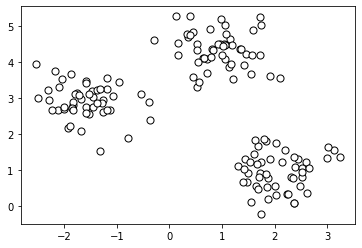

In [ ]:
# Imports
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Geração do dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# Plotagem do dataset
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

Quando aplicamos o K-means aos dados do mundo real usando uma métrica de distância euclidiana, queremos garantir que os dados sejam medidos na mesma escala, aplicando a padronização se necessário.

## Criação do Modelo

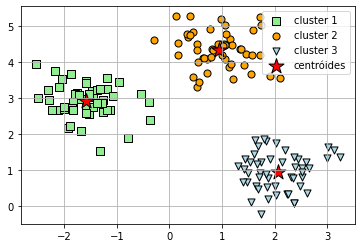

In [ ]:
# Criação do modelo
modelo = KMeans(
    n_clusters=3,   # número de clusters
    init='random',  # método de inicialização
    n_init=10,      # número de execuções com diferentes centróides aleatórios para escolher o modelo final
    max_iter=300,   # número máximo de iterações para cada execução única
    tol=1e-04,      # = 0,0001 - controla a tolerância com relação às alterações no erro quadrático dentro do cluster para declarar convergência
    random_state=0  # semente aleatória
)

# Predição dos clusters
y_km = modelo.fit_predict(X)

# Plotagem dos 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Plotagem dos centróides
plt.scatter(
    modelo.cluster_centers_[:, 0], modelo.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centróides'
)

# Legenda do gráfico
plt.legend(scatterpoints=1)

# Exibição do gráfico com clusters e centróides
plt.grid()
plt.show()

## Teste de diferentes valores de k

O número de clusters a serem escolhidos nem sempre pode ser tão óbvio em aplicativos do mundo real, especialmente se estivermos trabalhando com um conjunto de dados de maior dimensão, que não pode ser visualizado. O método do cotovelo (The Elbow Method) é uma ferramenta gráfica útil para estimar o número ideal de clusters ***k*** para um problema.

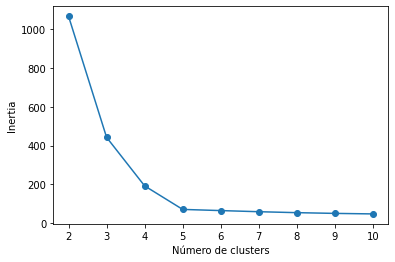

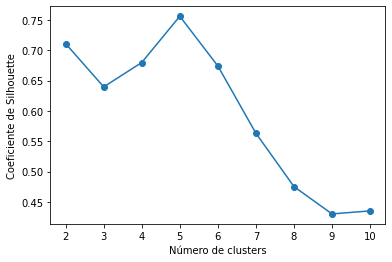

In [ ]:
from sklearn.metrics import silhouette_score

# Cria um array para armazenar a inércia e o shilhouette
distortions = []
shilhouette = []

# Cria modelos com k variando de 2 a 11, usando os mesmos parâmetros do modelo anterior
for i in range(2, 11):
    modelo = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    labels = modelo.fit_predict(X)
    distortions.append(modelo.inertia_) # Inertia: Soma das distâncias quadráticas dos pontos ao centróide de cluster mais próximo.
    shilhouette.append(silhouette_score(X, labels)) # Coeficiente de Silhouette

# Configura e exibe o gráfico - Inércia
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()

# Configura e exibe o gráfico - Coeficiente de Silhouette
plt.plot(range(2, 11), shilhouette, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

Como podemos ver no gráfico resultante, o "cotovelo" está localizado em k = 3, evidenciando que este valor é uma boa escolha para esse conjunto de dados. O coeficiente de Silhouette também tem o maior valor quando k = 3, confirmando esta escolha.

# K-Means - Exemplo 2

Baseado em: https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

(-15.0, 15.0)

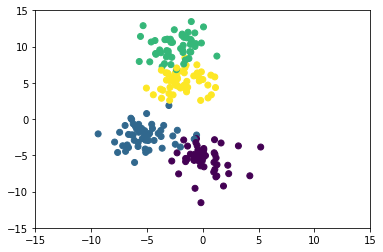

In [ ]:
# Imports
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Geração do dataset
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# Guarda os dados em um array
points = data[0]

# Plotagem do dataset
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

[[-2.40167949 10.17352695]
 [-5.56465793 -2.34988939]
 [-1.92101646  5.21673484]
 [ 0.05161133 -5.35489826]]


(-15.0, 15.0)

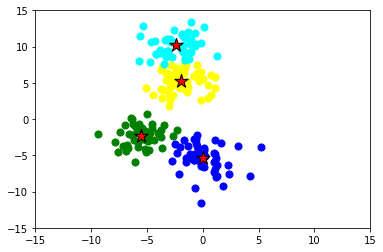

In [ ]:
# Criação do modelo
modelo = KMeans(n_clusters=4)

# Predição dos clusters
modelo.fit(points)

# Imprime os valores dos centróides
print(modelo.cluster_centers_)

# Guarda os clusters preditos para o gráfico
y_km = modelo.fit_predict(points)

# Exibição do gráfico com clusters e centróides
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=50, c='green')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=50, c='yellow')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=50, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=50, c='cyan')
plt.scatter(modelo.cluster_centers_[:, 0], modelo.cluster_centers_[:, 1], s=200, marker='*',c='red', edgecolor='black')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [ ]:
y_km

array([3, 2, 1, 3, 0, 2, 3, 2, 2, 0, 0, 3, 0, 1, 0, 1, 3, 3, 0, 0, 0, 1,
       3, 3, 3, 1, 3, 2, 1, 3, 3, 0, 0, 2, 2, 0, 0, 0, 1, 1, 3, 0, 1, 1,
       2, 2, 3, 1, 1, 3, 2, 0, 1, 3, 1, 1, 2, 0, 0, 1, 2, 2, 3, 2, 2, 3,
       2, 1, 3, 3, 2, 0, 3, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 3, 2,
       3, 0, 2, 3, 2, 1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 3, 1, 2, 1, 2, 0, 3,
       2, 0, 3, 3, 0, 1, 3, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 1, 1, 2, 0, 2,
       2, 1, 3, 1, 2, 3, 3, 0, 3, 1, 1, 2, 0, 3, 2, 1, 2, 0, 3, 0, 1, 2,
       2, 1, 3, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1,
       0, 2, 3, 1, 2, 1, 1, 3, 0, 2, 0, 3, 1, 2, 1, 1, 0, 1, 2, 3, 0, 1,
       0, 3], dtype=int32)

# Clusterização Hierárquica Aglomerativa - Exemplo 1

Baseado em: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

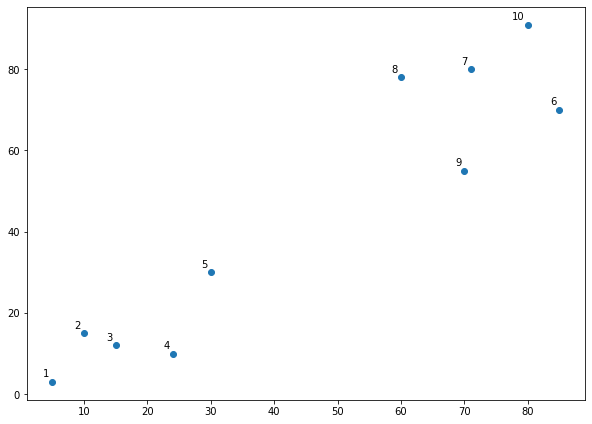

In [ ]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Geração dos dados
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

# Criação das labels e do gráfico
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

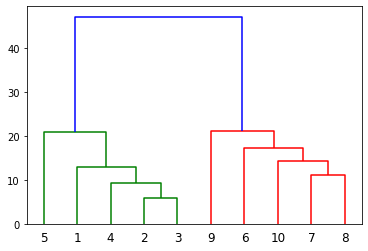

<Figure size 720x504 with 0 Axes>

In [ ]:
# Criação e plotagem do dendrograma
dendrogram(linkage(X, 'single'), # linkage - critério de distância utilizado para os clusters
            orientation='top',
            labels=range(1, 11),
            distance_sort='descending',
            show_leaf_counts=True)
plt.figure(figsize=(10, 7))
plt.show()

[0 0 0 0 0 2 1 1 2 1]


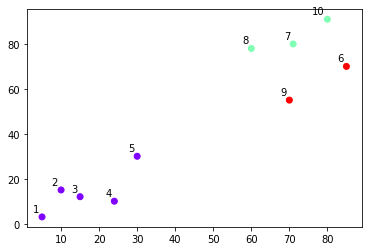

[1 1 1 1 3 2 0 0 2 0]


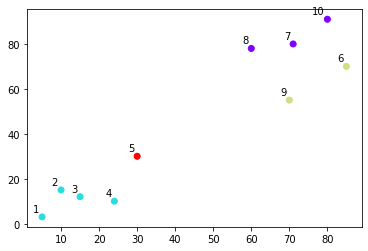

[1 1 1 1 3 0 2 2 0 4]


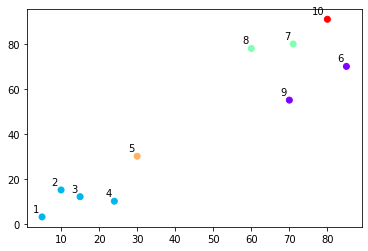

In [ ]:
# Criação de 3 modelos espeficicando diferentes valores de n_clusters

modelos = (
        ('2 clusters', AgglomerativeClustering(n_clusters=2)),
        ('4 clusters', AgglomerativeClustering(n_clusters=4)),
        ('5 clusters', AgglomerativeClustering(n_clusters=5)),
 )

# Para cada modelo de modelos
for nome, modelo in modelos:
  # Criação do modelo e predição dos clusters
  modelo.fit_predict(X)
  
  # Imprime o cluster de cada elemento
  print(modelo.labels_)

  # Exibição do gráfico com os clusters
  plt.scatter(X[:,0],X[:,1], c=modelo.labels_, cmap='rainbow')

  for label, x, y in zip(labels, X[:, 0], X[:, 1]):
      plt.annotate(
          label,
          xy=(x, y), xytext=(-3, 3),
          textcoords='offset points', ha='right', va='bottom')
  plt.show()

# Clusterização Hierárquica Aglomerativa - Exemplo 2

Baseado em: 
https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html


(-15.0, 15.0)

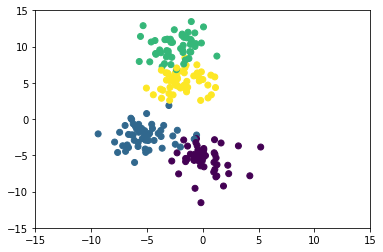

In [ ]:
# Imports
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Geração do dataset
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# Guarda os dados em um array
points = data[0]

# Plotagem do dataset
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

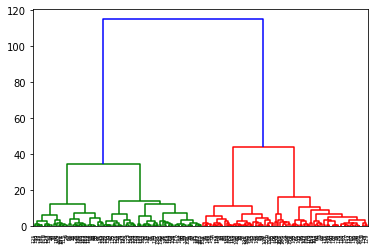

In [ ]:
# Criação e plotagem do dendrograma
dendrograma = sch.dendrogram(sch.linkage(points, method='ward'))
# 'ward' é um dos métodos do scipy que podem ser usados para calcular a distância entre os clusters. 

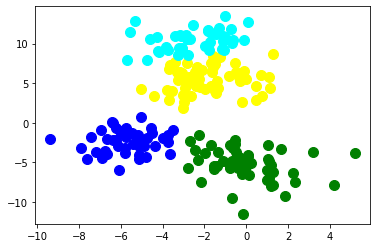

In [ ]:
# Criação do modelo e predição dos clusters
modelo = AgglomerativeClustering(n_clusters=4)

# Guarda os clusters preditos para o gráfico
y_hc = modelo.fit_predict(points)

# Exibição do gráfico com os clusters
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='green')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='yellow')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')

Parâmetros que podem ser utilizados em **AgglomerativeClustering**:

**affinity:** string or callable, default: “euclidean”

Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”,“cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

<br>

**linkage :** {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
* ***ward*** minimizes the variance of the clusters being merged.
* ***average*** uses the average of the distances of each observation of the two sets.
* ***complete*** or maximum linkage uses the maximum distances between all observations of the two sets.
* ***single*** uses the minimum of the distances between all observations of the two sets.

# Para se divertir: Comparação de algoritmos de Clustering

*Comparing different clustering algorithms on toy datasets*

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

Automatically created module for IPython interactive environment


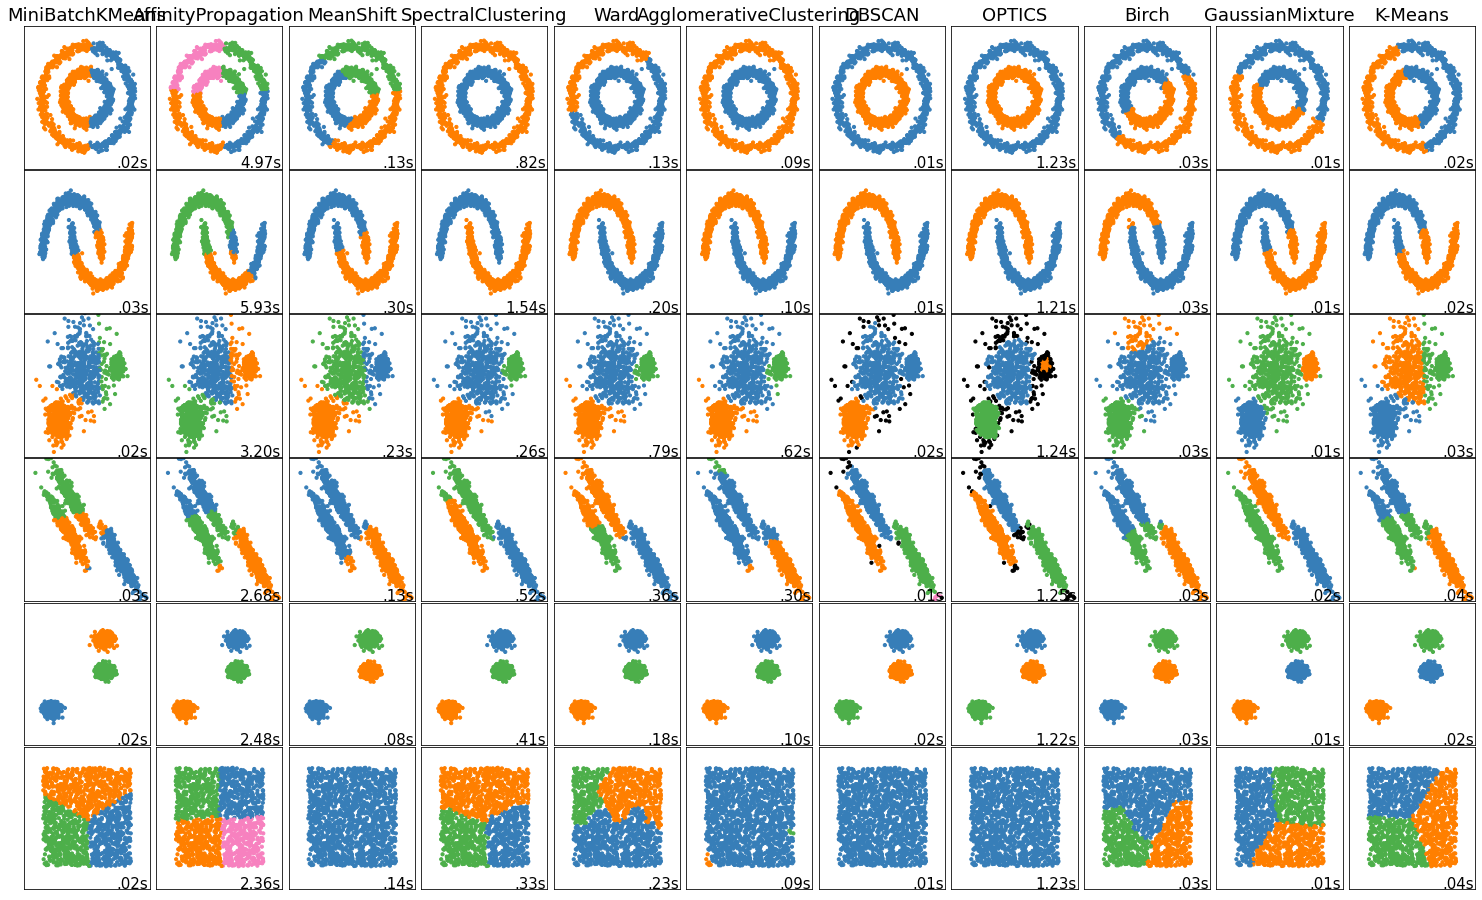

In [ ]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')
    kmeans = cluster.KMeans(
        n_clusters=params['n_clusters'], init='random')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm),
        ('K-Means', kmeans)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

# Exemplos mais "passo a passo" (Para Casa)

*A Beginner’s Guide to Hierarchical Clustering and how to Perform it in Python*

https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

*What is Hierarchical Clustering?*

https://medium.com/swlh/what-is-hierarchical-clustering-c04e9972e002

*10 Clustering Algorithms With Python*

https://machinelearningmastery.com/clustering-algorithms-with-python/

# Exemplos mais avançados (Para Casa):

*A demo of K-Means clustering on the handwritten digits data*

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

*Agglomerative clustering with different metrics*

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html